In [1]:
import keras
from keras.models import load_model
#from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Flatten, Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
import os
import pickle
import numpy as np
import h5py
from keras import backend as K
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import pandas as pd
from PIL import Image


Using TensorFlow backend.


In [2]:
batch_size = 16
num_classes = 10
epochs = 100

In [3]:
train=np.load("/mnt/Doc/256/picture.npy")
#train_label=np.load("/mnt/Doc/reserch1/train_type.npy")
##test=np.load("/mnt/Doc/512pix_to_128pix/npy/128pix_testpicture.npy")
val = np.load("/mnt/Doc/256/picture_val.npy")
#test_label=np.load("/mnt/Doc/reserch1/test_type.npy")

#x_train = train.astype('float32')
#x_test = test.astype('float32')
#x_val = val.astype('float32')
train /= 255
#x_test /= 255
val /=255
#del train
#del test
#del val

In [5]:
val = np.load("/mnt/Doc/256/picture_val.npy")
val /=255

In [6]:
#print('x_train shape:', x_train.shape)
print(train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
print(val.shape[0], 'val samples')


6000 train samples
500 val samples


In [5]:
# divide x_test into validation and test
#x_val = x_test[:900]
#x_test = x_test[900:]
#x_val_label = test_label[:900]
#x_test_label = test_label[900:]

In [6]:
#train_label_1=np_utils.to_categorical(train_label)
#test_label_1=np_utils.to_categorical(x_test_label)
#val_label_1=np_utils.to_categorical(x_val_label)


In [7]:
#print("validation data: {0} \ntest data: {1}".format(x_val.shape, x_test.shape))

In [4]:
input_img = Input(shape=(256, 256, 3))
x = Conv2D(4, (7, 7), padding='same')(input_img)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (5, 5), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), padding='same')(encoded)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (5, 5), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (7, 7), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
decoded = Activation('relu')(x)

In [5]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 4)       592       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 4)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 4)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 8)       808       
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 8)         0         
__________

In [6]:
modelCheckpoint = ModelCheckpoint(filepath ="/mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5",
                                 monitor="val_loss",
                                 verbose=1,
                                 save_best_only=True,
                                 save_weights_only=True,
                                 mode="min",
                                 period=1)

In [7]:
history = model.fit(train, train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(val, val),
                    callbacks=[modelCheckpoint],
                    shuffle=True)

Train on 6000 samples, validate on 500 samples
Epoch 1/100
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0391 - val_loss: 0.0076

Epoch 00001: val_loss improved from inf to 0.00759, saving model to /mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5
Epoch 2/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0067 - val_loss: 0.0062

Epoch 00002: val_loss improved from 0.00759 to 0.00620, saving model to /mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5
Epoch 3/100
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0056 - val_loss: 0.0050

Epoch 00003: val_loss improved from 0.00620 to 0.00502, saving model to /mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5
Epoch 4/100
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0048 - val_loss: 0.0047

Epoch 00004: val_loss improved from 0.00502 to 0.00468, saving model to /mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5
Epoch 5/100
6000/6000 [==================

6000/6000 [==============================] - 17s 3ms/step - loss: 0.0025 - val_loss: 0.0027

Epoch 00043: val_loss did not improve from 0.00240
Epoch 44/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0025 - val_loss: 0.0023

Epoch 00044: val_loss improved from 0.00240 to 0.00232, saving model to /mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5
Epoch 45/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0025 - val_loss: 0.0026

Epoch 00045: val_loss did not improve from 0.00232
Epoch 46/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0025 - val_loss: 0.0024

Epoch 00046: val_loss did not improve from 0.00232
Epoch 47/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0025 - val_loss: 0.0024

Epoch 00047: val_loss did not improve from 0.00232
Epoch 48/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0025 - val_loss: 0.0023

Epoch 00048: val_loss improved from 0.00232 to 0.

6000/6000 [==============================] - 16s 3ms/step - loss: 0.0022 - val_loss: 0.0021

Epoch 00090: val_loss improved from 0.00213 to 0.00211, saving model to /mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5
Epoch 91/100
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0022 - val_loss: 0.0021

Epoch 00091: val_loss did not improve from 0.00211
Epoch 92/100
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0022 - val_loss: 0.0021

Epoch 00092: val_loss improved from 0.00211 to 0.00210, saving model to /mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5
Epoch 93/100
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0022 - val_loss: 0.0023

Epoch 00093: val_loss did not improve from 0.00210
Epoch 94/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0022 - val_loss: 0.0022

Epoch 00094: val_loss did not improve from 0.00210
Epoch 95/100
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0

In [ ]:
from datetime import datetime
x = datetime.now().strftime("%Y.%m.%d %H:%M:%S")
y = datetime.now().strftime("%Y.%m.%d")
new_file_pass = os.path.join("/mnt/Doc/Autoencoder_data",y)
if os.path.exists(new_file_pass)==False:
    os.mkdir(new_file_pass)
else:
    pass
y1 = os.path.join(new_file_pass,"weight"+x+".h5")
z1 = os.path.join(new_file_pass,"model"+x+".json")
model.save_weights(y)
open(z1,"w").write(model.to_json())

In [ ]:
open("autoencodermodel1.json","w").write(model.to_json())

In [11]:
model.load_weights('/mnt/Doc/weight/Autoencoder/256/best_weight_0426.h5')

In [ ]:
images = []


In [10]:
images = []
path = "/mnt/Doc/2048pix_tissue_all/TRU/TCGA-50-5935-01A-01-TS1_2048_files/8_15.jpeg"
path = "/mnt/Doc/2048pix_tissue_all/PP/TCGA-78-7160-01A-01-TS1_2048_files/6_5.jpeg"
f = Image.open(path) 
images.append((np.asarray(f.convert('RGB'), dtype=np.float32))/255)
del f
f1 = Image.open(path) 
images.append((np.asarray(f1.convert('RGB'), dtype=np.float32))/255)
del f1

In [11]:
decoded_imgs=model.predict(images)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2 arrays: [array([[[0.47058824, 0.34117648, 0.5176471 ],
        [0.49019608, 0.34901962, 0.5294118 ],
        [0.5058824 , 0.35686275, 0.5568628 ],
        ...,
        [0.5294118 , 0.29803923, 0.4862745 ],
  ...

In [13]:
import matplotlib.pyplot as plt
import random

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


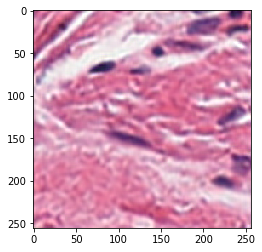

In [14]:
decoded_imgs.astype('uint8')
plt.imshow(decoded_imgs[9])

In [15]:
plt.imshow(x_test[2])

NameError: name 'x_test' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

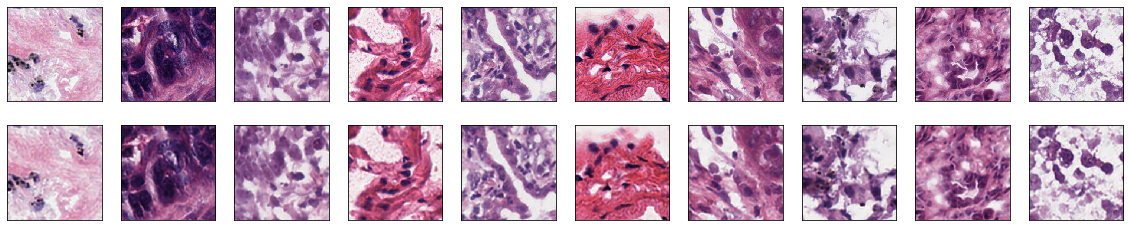

In [18]:
n=10
plt.figure(figsize=(20,4))
list1=range(len(val))
randam1=random.sample(list1,10)
for i in range(n):
    #オリジナル画像
    picture_num=randam1[i]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(val[picture_num])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #変換後画像
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[picture_num])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

In [ ]:
model.summary()

In [ ]:
input_img = Input(shape=(128, 128, 3))
x = Conv2D(32, (7, 7), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (5, 5), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(encoded)
x = Dense(128)(x)
x = Activation("relu")(x)
x = Dense(3)(x)
out = Activation("softmax")

In [ ]:
model = Model(input_img, out)
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

In [ ]:
import os 
import h5py
from keras import backend as K


In [ ]:
weights_path = ''

assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
layer_names = [n.decode('utf8') for n in f.attrs['layer_names']]
weight_value_tuples = []
for k, name in enumerate(layer_names):
    if k >= len(model.layers):
        # 全結合層の重みは読み込まない
        break
    g = f[name]
    weight_names = [n.decode('utf8') for n in g.attrs['weight_names']]
    if len(weight_names):
        weight_values = [g[weight_name] for weight_name in weight_names]
        layer = model.layers[k]
        symbolic_weights = layer.trainable_weights + layer.non_trainable_weights
        if len(weight_values) != len(symbolic_weights):
            raise Exception('Layer #' + str(k) +
                            ' (named "' + layer.name +
                            '" in the current model) was found to '
                            'correspond to layer ' + name +
                            ' in the save file. '
                            'However the new layer ' + layer.name +
                            ' expects ' + str(len(symbolic_weights)) +
                            ' weights, but the saved weights have ' +
                            str(len(weight_values)) +
                            ' elements.')
        weight_value_tuples += zip(symbolic_weights, weight_values)
K.batch_set_value(weight_value_tuples)
f.close()
print('Model loaded.')

In [ ]:
layer_names

In [ ]:
g = f["conv2d_15"]
weight_names = [n.decode("utf8") for n in g.attrs["weight_names"]]

In [16]:
#メモリ使用量確認
def print_varsize():
    import types
    print("{}{: >15}{}{: >10}{}".format('|','Variable Name','|','  Size','|'))
    print(" -------------------------- ")
    for k, v in globals().items():
        if hasattr(v, 'size') and not k.startswith('_') and not isinstance(v,types.ModuleType):
            print("{}{: >15}{}{: >10}{}".format('|',k,'|',str(v.size),'|'))
        elif hasattr(v, '__len__') and not k.startswith('_') and not isinstance(v,types.ModuleType):
            print("{}{: >15}{}{: >10}{}".format('|',k,'|',str(len(v)),'|'))

In [17]:
print_varsize()

|  Variable Name|      Size|
 -------------------------- 
|   decoded_imgs|  98304000|
|             In|        18|
|            val|  98304000|
|            Out|         4|
|          train|1179648000|


In [ ]:
del test_label_1

In [ ]:
x_val